In [102]:
import math
import matplotlib
import numpy as np
import pandas as pd

from datetime import date, datetime, time, timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


%matplotlib inline

stk_path = "C:/Users/Parikshit Ghosh/Downloads/ML models/CLX.csv"
test_size = 0.2                 
cv_size = 0.2                   
Nmax = 30                       
                                
fontsize = 14
ticklabelsize = 14

In [103]:
def get_preds_lin_reg(df, target_col, N, pred_min, offset):
    
    regr = LinearRegression(fit_intercept=True)

    pred_list = []

    for i in range(offset, len(df['adj_close'])):
        X_train = np.array(range(len(df['adj_close'][i-N:i]))) 
        y_train = np.array(df['adj_close'][i-N:i]) 
        X_train = X_train.reshape(-1, 1)      
                                             
                            
        y_train = y_train.reshape(-1, 1)
        regr.fit(X_train, y_train)            
        pred = regr.predict(np.array(N).reshape(1,-1))
    
        pred_list.append(pred[0][0])  
    
    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min
        
    return pred_list

def get_mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [104]:
df = pd.read_csv(stk_path, sep = ",")


df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')


df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]


df['month'] = df['date'].dt.month

df.sort_values(by='date', inplace=True, ascending=True)

df.head(10)

,date,open,high,low,close,adj_close,volume,month
0,2011-06-13,66.760002,67.059998,66.449997,66.760002,50.512547,703400,6
1,2011-06-14,67.110001,67.370003,66.930000,67.040001,50.724415,919700,6
2,2011-06-15,66.629997,66.980003,65.970001,66.300003,50.164494,948200,6
3,2011-06-16,66.089996,66.910004,66.089996,66.809998,50.550377,871700,6
4,2011-06-17,66.940002,67.980003,66.839996,67.540001,51.102718,1602300,6
5,2011-06-20,67.500000,68.099998,67.379997,67.860001,51.344837,664100,6
6,2011-06-21,68.220001,68.220001,67.720001,67.779999,51.284313,620300,6
7,2011-06-22,67.769997,68.050003,67.360001,67.430000,51.019489,480400,6
8,2011-06-23,66.900002,67.360001,66.459999,67.230003,50.868160,839200,6
9,2011-06-24,67.260002,67.389999,66.239998,66.290001,50.156921,1813000,6


Text(0, 0.5, 'USD')

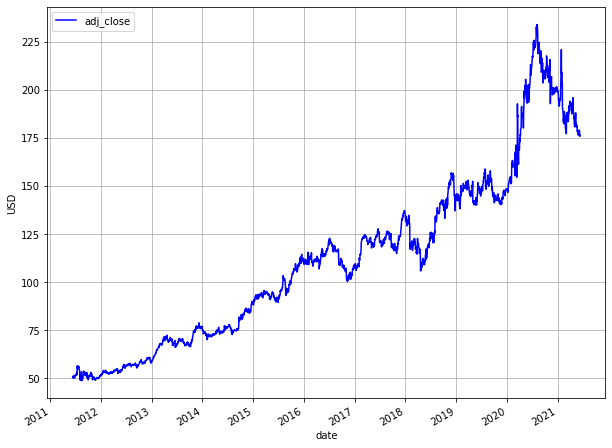

In [105]:

rcParams['figure.figsize'] = 10, 8 

ax = df.plot(x='date', y='adj_close', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [106]:
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

train = df[:num_train].copy()
cv = df[num_train:num_train+num_cv].copy()
train_cv = df[:num_train+num_cv].copy()
test = df[num_train+num_cv:].copy()
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 1510
num_cv = 503
num_test = 503
train.shape = (1510, 8)
cv.shape = (503, 8)
train_cv.shape = (2013, 8)
test.shape = (503, 8)


Text(0, 0.5, 'USD')

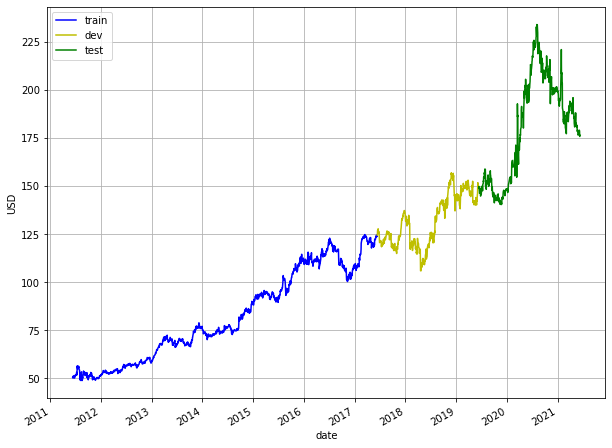

In [107]:

rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [108]:
RMSE = []
R2 = []
mape = []
for N in range(1, Nmax+1):
    est_list = get_preds_lin_reg(train_cv, 'adj_close', N, 0, num_train)
    
    cv.loc[:, 'est' + '_N' + str(N)] = est_list
    RMSE.append(math.sqrt(mean_squared_error(est_list, cv['adj_close'])))
    R2.append(r2_score(cv['adj_close'], est_list))
    mape.append(get_mape(cv['adj_close'], est_list))
print('RMSE = ' + str(RMSE))
print('R2 = ' + str(R2))
print('MAPE = ' + str(mape))
cv.head()

RMSE = [1.8057693100799466, 2.622025549901628, 2.320234347396091, 2.253821972152859, 2.259060835252584, 2.2555366480911547, 2.288629908650714, 2.345956901123261, 2.398521027660582, 2.4567159885133396, 2.499696913886624, 2.5297329173543246, 2.555929920986838, 2.5835301107002047, 2.615118235796746, 2.6524376466254616, 2.69862207788356, 2.7454227789068972, 2.7993045153430387, 2.860246402083213, 2.9233996824892556, 2.9819193967685043, 3.0366850455366596, 3.0865929001060106, 3.1326243481729663, 3.178101578268155, 3.220673240095827, 3.266491512375879, 3.309608034270871, 3.350095796644025]
R2 = [0.9807112079167521, 0.9593318576583101, 0.9681547839630266, 0.9699517133747008, 0.9698118604342935, 0.9699059753583765, 0.9690164173040847, 0.9674447859812427, 0.965969560588726, 0.9642981763119842, 0.963038021979823, 0.9621444256104807, 0.9613563285978188, 0.9605172356778725, 0.9595458430862762, 0.9583829911326646, 0.9569210970961705, 0.9554139537875348, 0.9536466863694792, 0.9516064599663644, 0.9494

,date,open,high,low,close,adj_close,volume,month,est_N1,est_N2,...,est_N21,est_N22,est_N23,est_N24,est_N25,est_N26,est_N27,est_N28,est_N29,est_N30
1510,2017-06-13,137.119995,137.899994,136.539993,137.479996,124.396362,430300,6,124.133934,124.179153,...,125.176698,124.998117,124.788427,124.651600,124.557766,124.393868,124.277479,124.240441,124.264076,124.064450
1511,2017-06-14,137.759995,139.649994,137.750000,139.110001,125.871216,723000,6,124.396362,124.658790,...,125.486713,125.359465,125.194818,124.998225,124.869485,124.780831,124.623922,124.511677,124.475331,124.497461
1512,2017-06-15,138.809998,140.550003,138.539993,140.160004,126.821342,851700,6,125.871216,127.346070,...,126.067355,125.888614,125.763859,125.602363,125.409125,125.279964,125.188886,125.031812,124.917292,124.875907
1513,2017-06-16,140.050003,140.449997,137.899994,139.500000,126.224083,1068000,6,126.821342,127.771468,...,126.544599,126.564308,126.387378,126.261062,126.098977,125.905669,125.773245,125.677264,125.517565,125.398635
1514,2017-06-19,139.630005,141.179993,139.000000,141.149994,127.717072,624700,6,126.224083,125.626824,...,126.837457,126.852557,126.873944,126.706851,126.586677,126.431052,126.244191,126.114812,126.019920,125.863030


(2.0, 30.0)

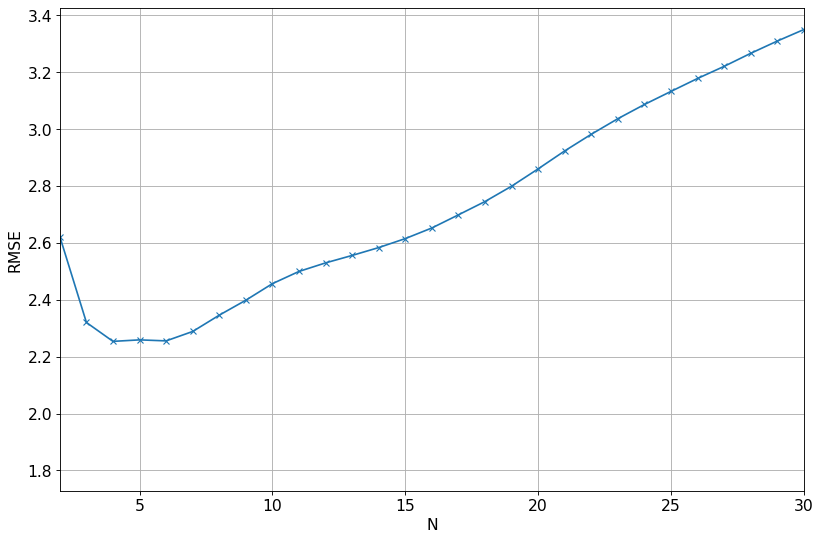

In [109]:
matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([2, 30])

Text(0, 0.5, 'R2')

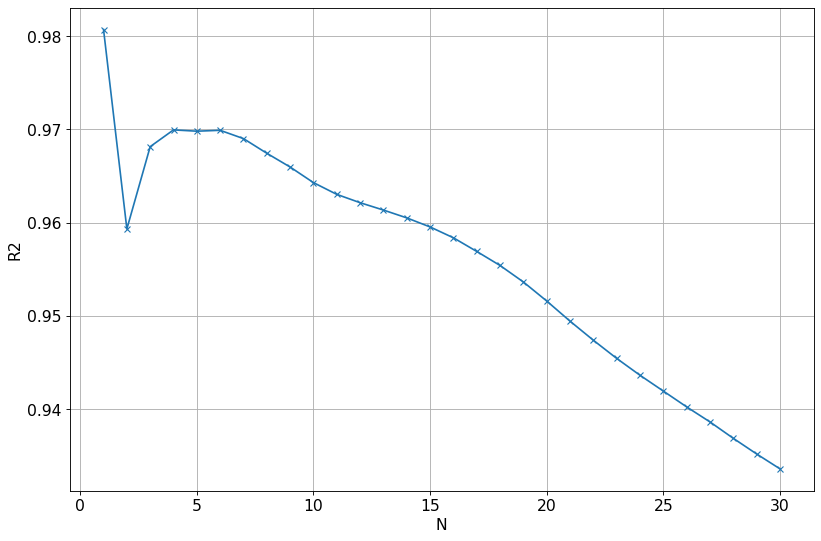

In [110]:
matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), R2, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('R2')

Text(0, 0.5, 'MAPE')

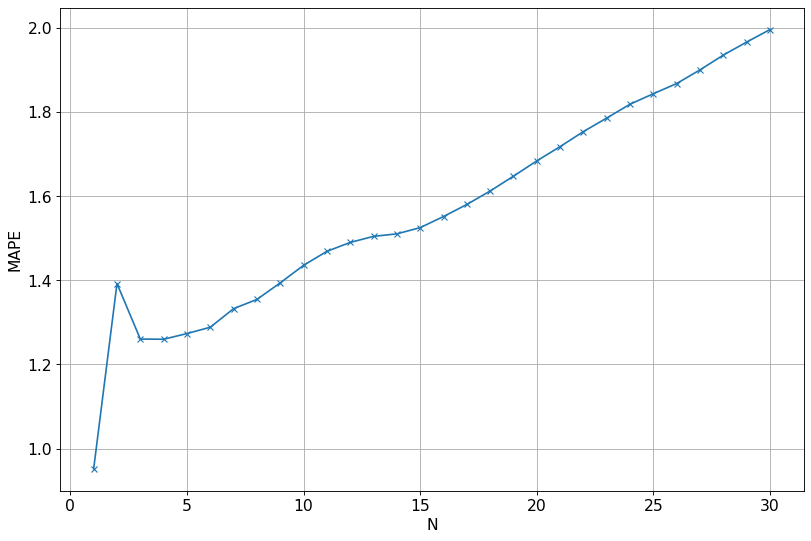

In [111]:
# Plot MAPE versus N. Note for MAPE smaller better. 
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), mape, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')

In [112]:
N_opt = 5

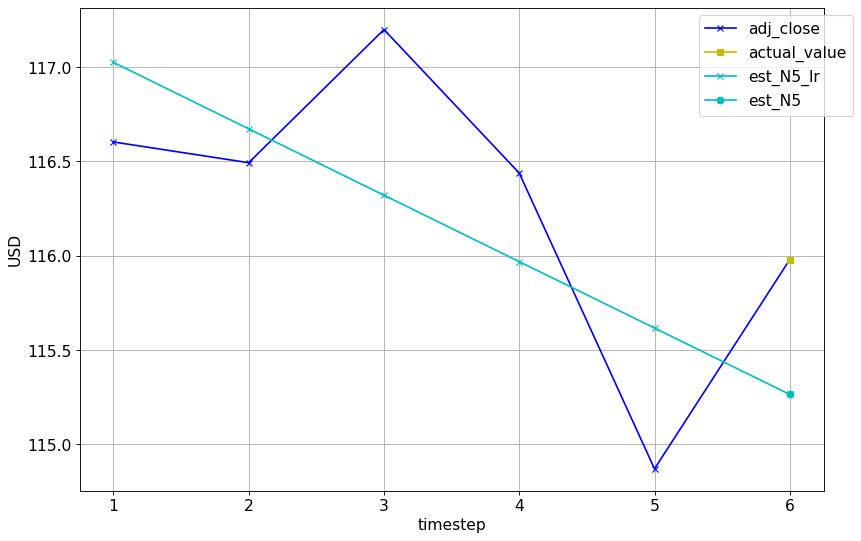

In [113]:
day = pd.Timestamp(date(2017, 10, 31))

Nmax2 = 5

df_temp = cv[cv['date'] <= day]
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1,Nmax2+2), df_temp[-Nmax2-1:]['adj_close'], 'bx-')
plt.plot(Nmax2+1, df_temp[-1:]['adj_close'], 'ys-')
legend_list = ['adj_close', 'actual_value']


color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
marker_list = ['x', 'x', 'x', 'x', 'x', 'x', 'x']
regr = LinearRegression(fit_intercept=True)
for N in range(5, Nmax2+1):
    X_train = np.array(range(len(df_temp['adj_close'][-N-1:-1])))
    y_train = np.array(df_temp['adj_close'][-N-1:-1])
    X_train = X_train.reshape(-1, 1)     
    y_train = y_train.reshape(-1, 1)
    regr.fit(X_train, y_train)            
    y_est = regr.predict(X_train)         
    plt.plot(range(Nmax2+1-N,Nmax2+2), 
             np.concatenate((y_est, np.array(df_temp['est_N'+str(N)][-1:]).reshape(-1,1))),
             color=color_list[N%len(color_list)], 
             marker=marker_list[N%len(marker_list)])
    legend_list.append('est_N'+str(N)+'_lr')
    
    plt.plot(Nmax2+1, 
             df_temp['est_N'+str(N)][-1:], 
             color=color_list[N%len(color_list)], 
             marker='o')
    legend_list.append('est_N'+str(N))
    

plt.grid()
plt.xlabel('timestep')
plt.ylabel('USD')
plt.legend(legend_list, bbox_to_anchor=(1.05, 1))
matplotlib.rcParams.update({'font.size': fontsize})

Text(0, 0.5, 'USD')

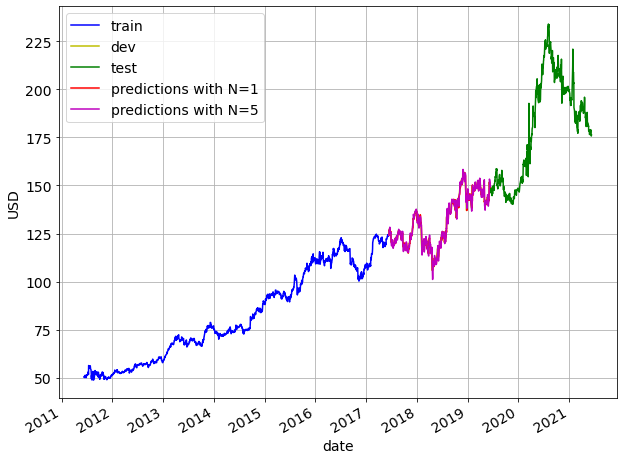

In [114]:
rcParams['figure.figsize'] = 10, 8 

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='r-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N5', style='m-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N=1', 'predictions with N=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to dev set')

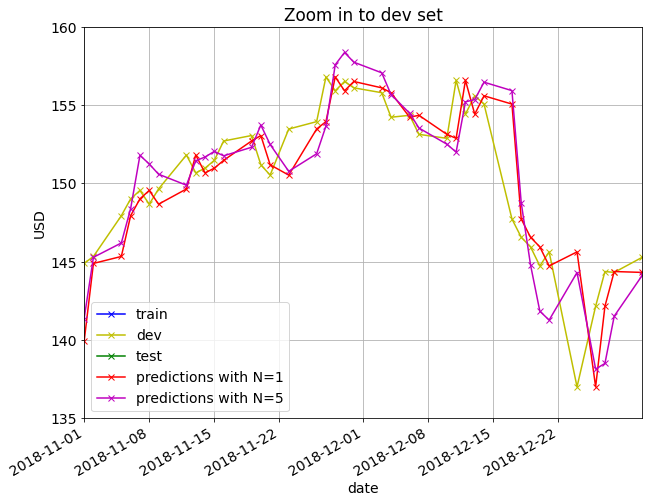

In [115]:
rcParams['figure.figsize'] = 10, 8 

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='rx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N5', style='mx-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N=1', 'predictions with N=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2018, 11, 1), date(2018, 12, 31)])
ax.set_ylim([135,160])
ax.set_title('Zoom in to dev set')

In [116]:
est_list = get_preds_lin_reg(df, 'adj_close', N_opt, 0, num_train+num_cv)
test.loc[:, 'est' + '_N' + str(N_opt)] = est_list
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(est_list, test['adj_close'])))
print("R2 = %0.3f" % r2_score(test['adj_close'], est_list))
print("MAPE = %0.3f%%" % get_mape(test['adj_close'], est_list))
test.head()

RMSE = 4.092
R2 = 0.976
MAPE = 1.433%


,date,open,high,low,close,adj_close,volume,month,est_N5
2013,2019-06-13,157.410004,157.850006,154.600006,155.979996,148.852020,1034800,6,148.596276
2014,2019-06-14,156.199997,157.300003,155.130005,156.880005,149.710876,697100,6,149.003767
2015,2019-06-17,157.220001,157.289993,154.210007,154.820007,147.745041,786700,6,149.395005
2016,2019-06-18,155.309998,155.559998,152.500000,153.639999,146.618942,766000,6,148.248901
2017,2019-06-19,153.350006,153.770004,151.820007,153.080002,146.084534,826600,6,146.325014


Text(0, 0.5, 'USD')

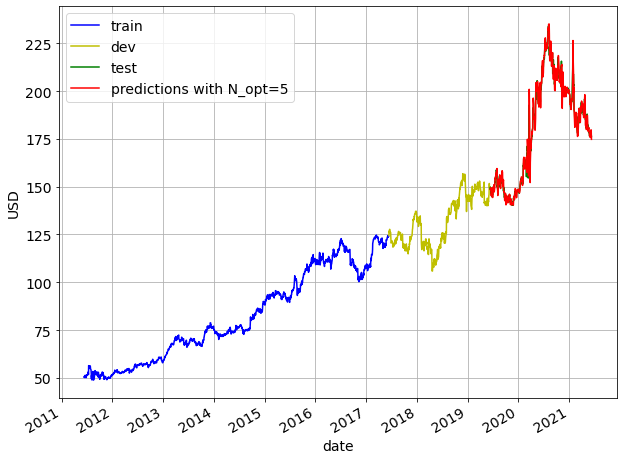

In [117]:
rcParams['figure.figsize'] = 10, 8 

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N5', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N_opt=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to test set')

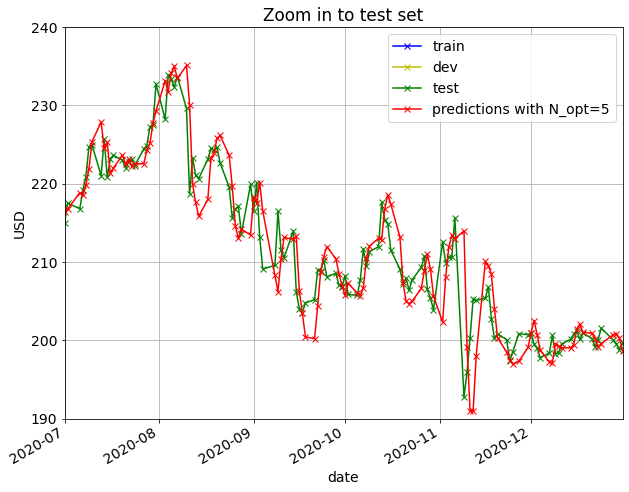

In [118]:
rcParams['figure.figsize'] = 10, 8 

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N5', style='rx-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N_opt=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2020, 7, 1), date(2020, 12, 31)])
ax.set_ylim([190,240])
ax.set_title('Zoom in to test set')

(190.0, 240.0)

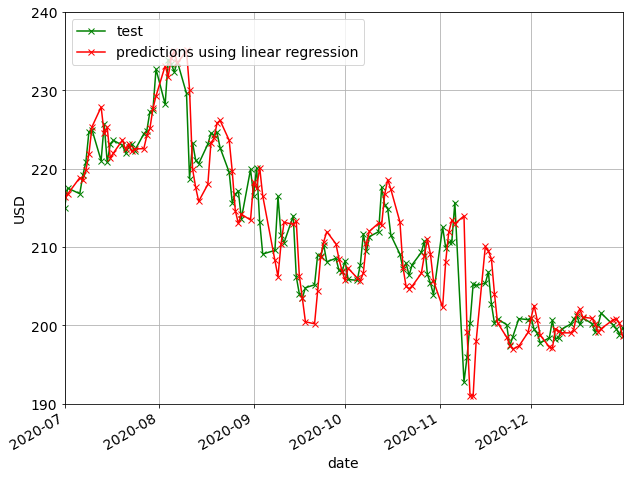

In [119]:
rcParams['figure.figsize'] = 10, 8
matplotlib.rcParams.update({'font.size': 14})

ax = test.plot(x='date', y='adj_close', style='gx-', grid=True)
ax = test.plot(x='date', y='est_N5', style='rx-', grid=True, ax=ax)
ax.legend(['test', 'predictions using linear regression'], loc='upper left')
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2020, 7, 1), date(2020, 12, 31)])
ax.set_ylim([190, 240])

In [120]:
test_lin_reg_CLX = test
test_lin_reg_CLX.to_csv("C:/Users/Parikshit Ghosh/Downloads/ML models/test_moving_avg_CLX.csv")